# 用`selenium`登入網站

### 載入基本套件

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from fake_useragent import UserAgent

### 連接至主機的chrome，似乎不用chromedriver，只要安裝chrome瀏覽器就行了

In [2]:
options = Options() 

ua = UserAgent()
userAgent = ua.random

print(userAgent)

options.add_argument(f'user-agent={userAgent}')
options.add_argument('--headless')  # 非本機執行，必須啟動Headless模式
options.add_argument('--disable-gpu') # 關閉GPU 避免某些系統或是網頁出錯
options.add_argument("--disable-notifications") # 關閉彈出視窗

# 如果chromedriver沒有在PATH中，就要將完整路徑放入
# service = Service(r"/home/must/workspace/selenium/chromedriver")

# 如果chromedriver有在PATH中，直接
service = Service()

#載入瀏覽器
driver = webdriver.Chrome(service=service, options=options)

url = 'http://siliconexam.com/st-register.php'
driver.get(url)
driver.get_screenshot_as_file('0driver.png')


Mozilla/4.0 (compatible; MSIE 5.5; Windows NT5)


True

### 從下拉選單選擇並輸入`country`值
* 使用`selenium.webdriver.support.ui`的`Select`元件
* 使用`random`套件來從0-232個國家中隨機挑選
* 使用`driver.find_element("name", "country_id")`，其中`country_id`要自己去F12找。
* 找到後用`country_id.select_by_value(str(random.randint(1,233)))`輸入，其中數字要轉成字串
* 最抓個圖看看

In [3]:
from selenium.webdriver.support.ui import Select
import random

country_id = Select(driver.find_element("name", 'country_id'))
country_id.select_by_value(str(random.randint(1,233)))
driver.get_screenshot_as_file('1country.png')

True

### 輸入姓名，使用`faker`套件及自訂義的`randomCountry()`來產生不同語言的姓名


In [4]:
from faker import Factory

faker = Factory.create('en')
fname = faker.first_name()
lname = faker.last_name()
print(fname, lname)

Joanna Rogers


### 還可以輸入其它國家的名字，自定義一個地區代碼函數

In [5]:
from random import randint
def randomCountry():
    countryCodes = [
        "bg_BG",
        "cs_CZ",
        "de_DE",
        "dk_DK",
        "el_GR",
        "en_US",
        "es_ES",
        "fa_IR",
        "fi_FI",
        "fr_FR",
        "hi_IN",
        "it_IT",
        "lt_LT",
        "lv_LV",
        "ne_NP",
        "nl_NL",
        "no_NO",
        "pl_PL",
        "pt_BR",
        "pt_PT",
        "sl_SI",
        "sv_SE",
        "tr_TR",
        "ru_RU",
        "ja_JP",
        "ko_KR",
        "zh_CN",
        "zh_TW"
    ]
    return countryCodes[randint(0,27)]

### 建立隨機中文名字

In [6]:
# fakertw = Factory.create(randomCountry())
fakertw = Factory.create("zh_TW")
fname = fakertw.first_name()
lname = fakertw.last_name()
print(fname, lname)

家瑜 楊


### 把中文名字填上去

In [7]:
fcname = driver.find_element("name", "fcname")
fcname.clear()
fcname.send_keys(lname)

lcname = driver.find_element("name", "lcname")
lcname.clear()
lcname.send_keys(fname)

driver.get_screenshot_as_file('2cname.png')

True

### 隨機產生英文姓名，英文姓名填上去

In [8]:
faker = Factory.create("en")

fename = driver.find_element("name", "fename")
fename.clear()
fename.send_keys(faker.first_name())

lename = driver.find_element("name", "lename")
lename.clear()
lename.send_keys(faker.last_name())
driver.get_screenshot_as_file('3ename.png')

True

### 填入生日

In [9]:
useryy = Select(driver.find_element("name", 'yy'))
useryy.select_by_value("2016")

usermm = Select(driver.find_element("name", 'mm'))
usermm.select_by_value("01")

userdd = Select(driver.find_element("name", 'dd'))
userdd.select_by_value("01")
driver.get_screenshot_as_file('4birthday.png')

True

### 填入性別

In [10]:
# value=1是男生，0是女生
usergender = driver.find_element("xpath", ".//input[@type='radio' and @value='0']")

# 選完後要按下去
usergender.click()

driver.get_screenshot_as_file('5sex.png')

True

### 隨機產生學校和科系名稱，並且填入

In [11]:
school = driver.find_element("name", "school")
school.send_keys("National "+faker.country()+" University")

department = driver.find_element("name", "dt")
department.send_keys(faker.city()+" Department")
driver.get_screenshot_as_file('6school.png')

True

### 網站很爛，不檢查身份證字號格式，因此就用隨機產生

In [12]:
import string

myid = driver.find_element("name", "id")
#id.send_keys("A123456789")
loginid=random.choice(string.ascii_uppercase)+str(random.randint(1,999999999)).zfill(8)
myid.clear()
myid.send_keys(loginid)
driver.get_screenshot_as_file('7id.png')

True

### 隨機產生電子郵件並填入

In [13]:
myemail = faker.email()
email = driver.find_element("name", "email")
email.clear()
email.send_keys(myemail)

remail = driver.find_element("name", "remail")
remail.clear()
remail.send_keys(myemail)
driver.get_screenshot_as_file('8email.png')

True

### 隨機輸入電話地址

In [14]:
phone = driver.find_element("name", "phone")
phone.clear()
phone.send_keys(fakertw.phone_number())

driver.get_screenshot_as_file('9phone.png')

address = driver.find_element("name", "address")
address.clear()
address.send_keys(fakertw.address())

driver.get_screenshot_as_file('10address.png')

True

### 按下閱讀聲明的確認

In [15]:
confirm = driver.find_element("xpath", "//input[@name='confirm']")

confirm.click()
# driver.execute_script("window.scrollTo(0, 1200)") 
driver.get_screenshot_as_file('11confirm.png')

True

### 破解captcha
* 先準備好可能出現的英文和數字，放在`./letters`資料夾中。
* 將網站上的captcha圖案抓下來(使用`Image.crop`)，並且切割成一個個數字及英文
* 將這些數字和英文，用機器學習的mean squared error方式和`./letters`的資料夾中現有的英文及數字進行比對，如果最符合，即傳回該數字或字母的檔案主檔名，即該數字或英文
* 將組合好的captcha文字輸入網頁完成破解

### 先將captcha的圖檔下載回來，檔名為`number.php.png`(不行用這個，會更新captcha圖片)

In [16]:
'''
import urllib.request

captchaimage = driver.find_element("xpath", '//img[@id="chkimg"]')
src = captchaimage.get_attribute('src')
urllib.request.urlretrieve(src, "number.php.png")
'''

'\nimport urllib.request\n\ncaptchaimage = driver.find_element("xpath", \'//img[@id="chkimg"]\')\nsrc = captchaimage.get_attribute(\'src\')\nurllib.request.urlretrieve(src, "number.php.png")\n'

In [17]:
captchaimage = driver.find_element("xpath", '//img[@id="chkimg"]')
location = captchaimage.location
size = captchaimage.size
captchaimage.screenshot("number.php.png")

True

### 破解captcha的函式`defeatCaptcha()`
#### 主要將後面的噪音去除
* 先將不用的邊切掉，變成`crop`
* 將`crop`轉成`hsv`的顏色空間
* 定義兩個黑色的上下界`lower_black`和`upper_black`。
* 使用2x2全填1的矩陣做為核心
* 建立一個以此上下界為主的`mask`
* 先用`closing`將噪點去除
* 再用`dilation`讓字型變大，接近比對的單一字
#### 將圖切成一個個小圖
#### 將小圖和`letter`資料中央的每一個字體小圖用`mse`方式比對，最小值即為符合
#### 將符合的檔名(即代表該圖的值)用文字方法傳回來
#### 最後將所有的文字放成一個字串，即為破解碼
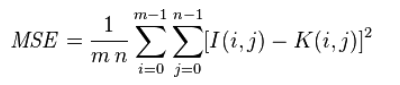


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

def defeatCaptcha():
          
    image=cv2.imread('number.php.png')
    
    crop=image[20:35,50:160]
    cv2.imwrite("cropped.jpg", crop)
    hsv=cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
    cv2.imwrite("hsv.jpg", hsv)
    
    lower_black=np.array([0,0,0])
    upper_black=np.array([179,50,100])
    kernel = np.ones((2,2),np.uint8)  

    mask=cv2.inRange(hsv, lower_black, upper_black)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    dilation = cv2.dilate(closing,kernel,iterations = 1)
    cv2.imwrite("closing.jpg", closing)
    cv2.imwrite("dilation.jpg", dilation)
        
    j=1
    crops={}
    breakcode=''
    
    for i in range(1,7):
        cv2.imwrite("crop"+str(i)+".png",dilation[4:16, j:j+9])
        crops[i]=cv2.imread("crop"+str(i)+".png")
        
        breakcode+=getNumber(crops[i])
        j=j+20

    return breakcode
    
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


def getNumber(pic):
    min_a = 999999999
    min_png= None
    for png in os.listdir('letters'):
        ref = cv2.imread("letters/" + png)
        if mse(ref, pic) < min_a:
            min_a = mse(ref, pic)
            min_png = png
    return min_png[0]

### 獲得captcha驗證碼

1931bf


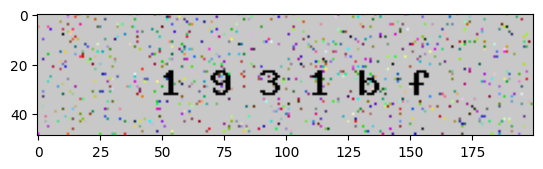

In [19]:
%matplotlib inline
captcha = defeatCaptcha()
print(captcha)
img = cv2.imread("number.php.png")
plt.imshow(img, cmap='gray')

### 將captcha破解後的文字碼輸入

In [20]:
rvcode = driver.find_element("name", "rvcode")
rvcode.clear()
rvcode.send_keys(captcha)
driver.get_screenshot_as_file('12captcha.png')

True

### 按下「確定」按鈕

In [21]:
import time
mysubmit = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "submit")))
mysubmit.submit()
time.sleep(3)
driver.get_screenshot_as_file('13done.png')

True

In [22]:
print(loginid)
print("20160101")

M289349791
20160101


### 自動登入

In [23]:
loginurl = "http://siliconexam.com/st-login.php"
driver.get(loginurl)
login_id = driver.find_element("name", "id")
login_id.clear()
login_id.send_keys(loginid)

passwd = driver.find_element("name", "passwd")
passwd.clear()
passwd.send_keys("20160101")

time.sleep(2)
driver.get_screenshot_as_file('14login.png')
driver.find_element('xpath', '//input[@id="lsubmit"]').click()
time.sleep(2)
driver.get_screenshot_as_file('15logindone.png')

True

### 上傳照片

In [24]:
# WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, '//a[@href="st-photo.php"]'))).click()
driver.find_element('xpath', '//a[@href="st-photo.php"]').click()
time.sleep(2)
driver.get_screenshot_as_file('16photo.png')

True

### 從圖片庫中隨機選擇要上傳的照片

In [25]:
myphoto = '/home/must/workspace/selenium/pics/'+'images_'+str(random.randint(570,684)).zfill(3)+'.jpg'
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "photo"))).send_keys(myphoto)
time.sleep(1)
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@href="javascript:$.colorbox.close();"]'))).click()
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "submit"))).click()
time.sleep(1)
driver.get_screenshot_as_file('17doneupload.png')   

True

### 關閉連線

In [26]:
driver.close()